+ **حذف نویز گوسی با فیلتر بلوری**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io
from skimage import img_as_float

In [2]:
image_folder = "images"
im_camera = os.path.join(image_folder,"cameraman.tif")

In [3]:
im1 = io.imread(im_camera)
im1 = img_as_float(im1)

In [174]:
c = 1.2
im_transform = c*np.log(1+im1)

In [217]:
from skimage.util import random_noise

In [218]:
im_noisy = random_noise(im1,mode="gaussian",mean=0.0,var=0.01)

In [219]:
blur_box_kernel = np.ones((3,3)) / 9

In [220]:
from scipy.signal import convolve2d

In [221]:
im_denoise = convolve2d(im_noisy,blur_box_kernel,mode="same")

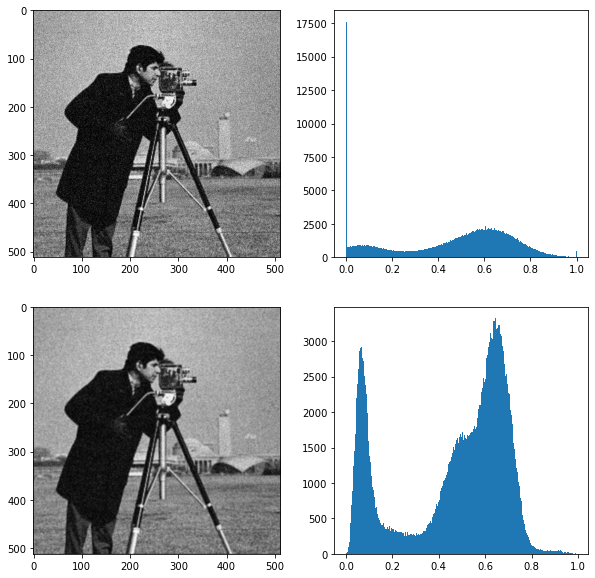

In [223]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes[0,0].imshow(im_noisy,cmap="gray")
axes[0,1].hist(im_noisy.ravel(),bins=256);# use ; to prevent showing data
axes[1,0].imshow(im_denoise,cmap="gray")
axes[1,1].hist(im_denoise.ravel(),bins=256);

**معیارهای ارزیابی**

In [240]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [247]:
print("Noisy PSNR = ",psnr(im_noisy,im1))
print("Denoised PSNR = ",psnr(im_denoise,im1))

Noisy PSNR =  20.40187408718776
Denoised PSNR =  27.73990571221124


In [248]:
print("Noisy SSIM = ",ssim(im_noisy,im1))
print("Denoised SSIM = ",ssim(im_denoise,im1))

Noisy SSIM =  0.41994885922210345
Denoised SSIM =  0.8287506824683473


Text(0.5, 1.0, 'PSNR = 27.74\nSSIM = 0.83')

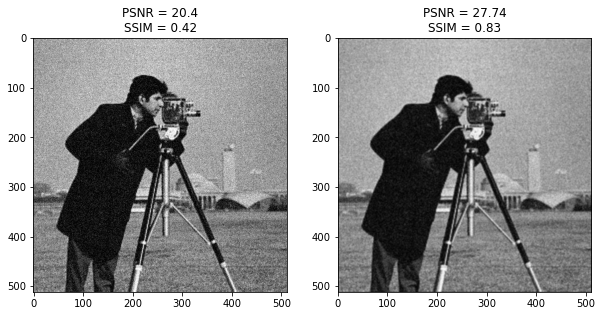

In [249]:
fig, axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(im_noisy,cmap="gray")
axes[0].set_title("PSNR = " + str(np.round(psnr(im_noisy,im1),2))+"\nSSIM = " + str(np.round(ssim(im_noisy,im1),2)))
axes[1].imshow(im_denoise,cmap="gray")
axes[1].set_title("PSNR = " + str(np.round(psnr(im_denoise,im1),2))+"\nSSIM = " + str(np.round(ssim(im_denoise,im1),2)))

**فیلتر گوسی**

In [250]:
from skimage.filters import gaussian

In [253]:
im_denoise = gaussian(im_noisy,sigma=1.2)

Text(0.5, 1.0, 'PSNR = 28.83\nSSIM = 0.89')

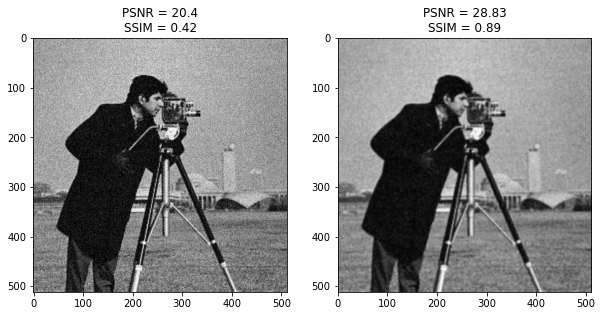

In [254]:
fig, axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(im_noisy,cmap="gray")
axes[0].set_title("PSNR = " + str(np.round(psnr(im_noisy,im1),2))+"\nSSIM = " + str(np.round(ssim(im_noisy,im1),2)))
axes[1].imshow(im_denoise,cmap="gray")
axes[1].set_title("PSNR = " + str(np.round(psnr(im_denoise,im1),2))+"\nSSIM = " + str(np.round(ssim(im_denoise,im1),2)))

**حذف نویز فلفلی و نمکی  با فیلتر میانه**

In [255]:
from skimage.filters import median

In [268]:
im_noisy = random_noise(im1,mode="s&p",amount = 0.05,salt_vs_pepper=0.5)

In [269]:
im_denoise = median(im_noisy)

Text(0.5, 1.0, 'PSNR = 35.84\nSSIM = 0.99')

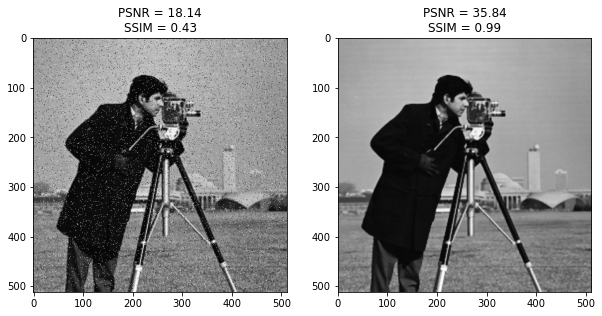

In [270]:
fig, axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(im_noisy,cmap="gray")
axes[0].set_title("PSNR = " + str(np.round(psnr(im_noisy,im1),2))+"\nSSIM = " + str(np.round(ssim(im_noisy,im1),2)))
axes[1].imshow(im_denoise,cmap="gray")
axes[1].set_title("PSNR = " + str(np.round(psnr(im_denoise,im1),2))+"\nSSIM = " + str(np.round(ssim(im_denoise,im1),2)))

**مشتقات تصویر**

**فیلتر Sobel**

In [44]:
from skimage.filters import sobel_h, sobel_v, sobel

In [303]:
im_checkerboard = os.path.join(image_folder,"checkerboard.tif")
im2 = io.imread(im_checkerboard)

In [306]:
im_filter_h = sobel_h(im2)
im_filter_v = sobel_v(im2)
im_filter = sobel(im2)

Text(0.5, 1.0, 'Gxy')

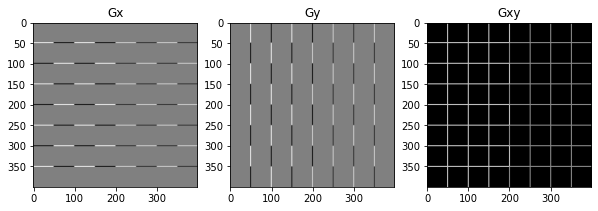

In [307]:
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(im_filter_h,cmap="gray")
axes[0].set_title("Gx")
axes[1].imshow(im_filter_v,cmap="gray")
axes[1].set_title("Gy")
axes[2].imshow(im_filter,cmap="gray")
axes[2].set_title("Gxy")

**فیلتر Prewitt**

In [45]:
from skimage.filters import prewitt_h, prewitt_v, prewitt

In [310]:
im_filter_h = prewitt_h(im2)
im_filter_v = prewitt_v(im2)
im_filter = prewitt(im2)

Text(0.5, 1.0, 'Gxy')

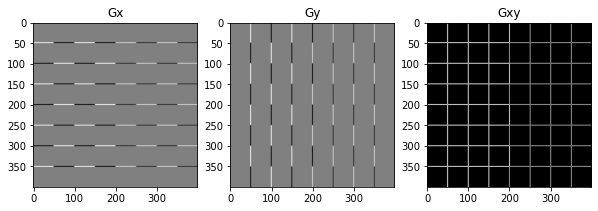

In [311]:
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(im_filter_h,cmap="gray")
axes[0].set_title("Gx")
axes[1].imshow(im_filter_v,cmap="gray")
axes[1].set_title("Gy")
axes[2].imshow(im_filter,cmap="gray")
axes[2].set_title("Gxy")

**فیلتر Scharr**

In [46]:
from skimage.filters import scharr_h, scharr_v, scharr

In [314]:
im_filter_h = scharr_h(im2)
im_filter_v = scharr_v(im2)
im_filter = scharr(im2)

Text(0.5, 1.0, 'Gxy')

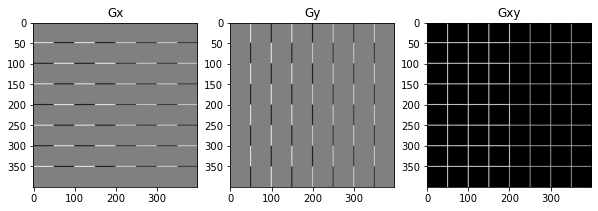

In [315]:
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(im_filter_h,cmap="gray")
axes[0].set_title("Gx")
axes[1].imshow(im_filter_v,cmap="gray")
axes[1].set_title("Gy")
axes[2].imshow(im_filter,cmap="gray")
axes[2].set_title("Gxy")

**مشتق مرتبه دوم یا لاپلاسین**

In [47]:
from skimage.filters import laplace

In [321]:
im_filter = laplace(im2)

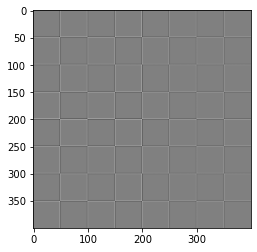

In [323]:
plt.imshow(im_filter,cmap="gray")

**لبه یابی**

In [4]:
im_church = os.path.join(image_folder,"church.gif")
im3 = io.imread(im_church)

In [48]:
from skimage.filters import roberts

In [49]:
im_filter_robert = roberts(im3)
im_filter_scharr = scharr(im3)
im_filter_sobel = sobel(im3)
im_filter_prewitt = prewitt(im3)
im_filter_laplace = laplace(im3)


Text(0.5, 1.0, 'Original')

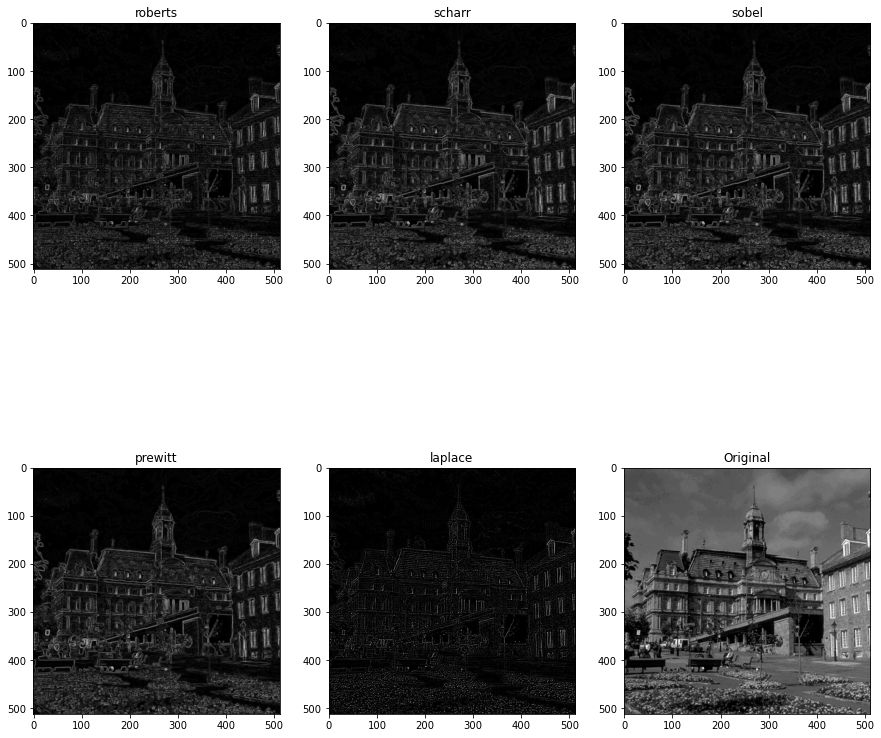

In [50]:
fig, axes = plt.subplots(2,3,figsize=(15,15))
axes[0,0].imshow(im_filter_robert,cmap="gray")
axes[0,0].set_title("roberts")
axes[0,1].imshow(im_filter_scharr,cmap="gray")
axes[0,1].set_title("scharr")
axes[0,2].imshow(im_filter_sobel,cmap="gray")
axes[0,2].set_title("sobel")
axes[1,0].imshow(im_filter_prewitt,cmap="gray")
axes[1,0].set_title("prewitt")
axes[1,1].imshow(np.clip(im_filter_laplace,0,1),cmap="gray")
axes[1,1].set_title("laplace")
axes[1,2].imshow(im3,cmap="gray")
axes[1,2].set_title("Original")

In [58]:
from skimage.feature import canny

In [59]:
im_filter = canny(im3,sigma=2.0)

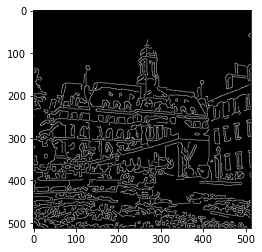

In [60]:
plt.imshow(im_filter,cmap="gray")

In [67]:
from skimage.filters import difference_of_gaussians

In [91]:
sigma = 1
im_filter = difference_of_gaussians(im3, sigma)# high_sigma = 1.6xsigma

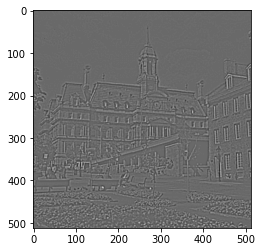

In [92]:
plt.imshow(im_filter,cmap="gray")

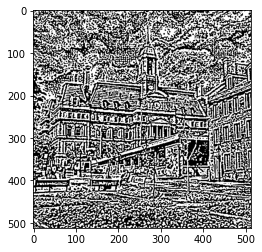

In [112]:
im_filter_copy = np.copy(im_filter)
im_filter_copy[im_filter_copy >= 0] = 1.0
im_filter_copy[im_filter_copy < 0] = 0
plt.imshow(im_filter_copy,cmap="gray")

In [220]:
im_astro = os.path.join(image_folder,"plate.png")
im4 = io.imread(im_astro,as_gray=True)

In [221]:
from skimage import img_as_float
im4 = img_as_float(im4)

In [222]:
from skimage.transform.pyramids import pyramid_laplacian

In [229]:
pyramids = tuple(pyramid_laplacian(im1,downscale=2,max_layer=5))

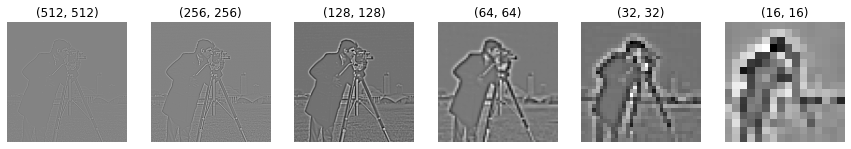

In [231]:
fig, axes = plt.subplots(1,6,figsize=(15,15))
i = 0
for p in pyramids:
    axes[i].imshow(p,cmap="gray")
    axes[i].set_title(str(p.shape))#show image size
    axes[i].axis("off")
    i += 1

**بازسازی**

In [ ]:
from skimage.transform.pyramids import pyramid_expand

In [249]:
w1 = pyramid_expand(pyramids[5]) + pyramids[4]
w2 = pyramid_expand(w1) + pyramids[3]
w3 = pyramid_expand(w2) + pyramids[2]
w4 = pyramid_expand(w3) + pyramids[1]
w5 = pyramid_expand(w4) + pyramids[0]
im_reconstructed = w5

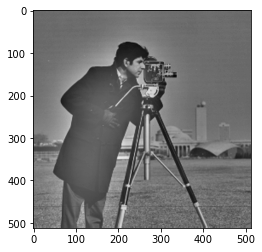

In [250]:
plt.imshow(im_reconstructed,cmap="gray")

In [368]:
hlaf_w = int(W/2)
half_h = int(H/2)

In [369]:
im_shift[hlaf_w-20:hlaf_w+21,half_h-20:half_h+21] = 0

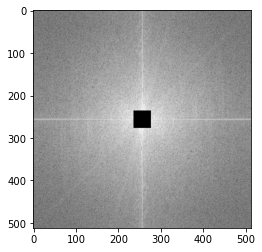

In [370]:
plt.imshow(20*np.log10(0.01+np.abs(im_shift)),cmap="gray")

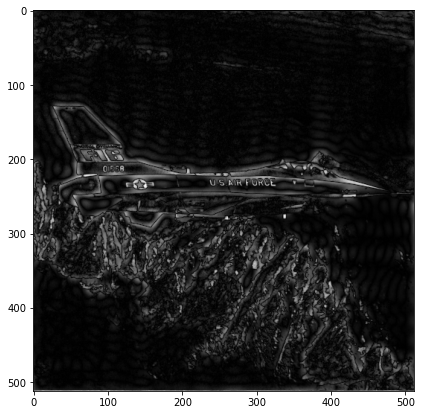

In [371]:
plt.figure(figsize=(7,7))
im_filter = np.abs(ifft2(fftshift(im_shift)))
plt.imshow(im_filter)

**بازیابی تصاویر با روش فیلتر معکوس**

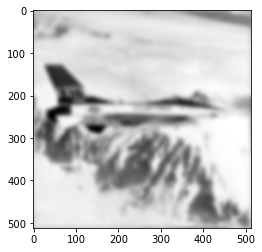

In [384]:
plt.imshow(im_reconstruct)

In [395]:
epsilon = 1e-6
inverse_kernel = 1/(epsilon + gaussian_kernel_frq)

In [396]:
im_reconstruct_frq = fft2(im_reconstruct)

In [397]:
im_restor_frq = im_reconstruct_frq * inverse_kernel

In [400]:
im_restor = np.abs(fftshift(ifft2(im_restor_frq)))

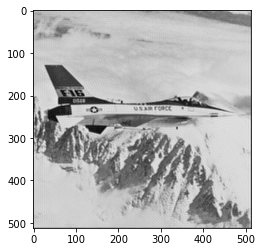

In [401]:
plt.imshow(im_restor)

اختلاف تصویر بازیابی شده با تصویر اصلی

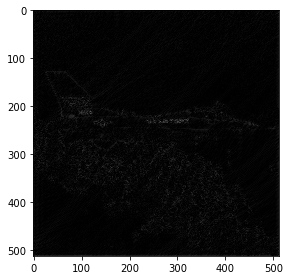

In [402]:
from skimage.util import compare_images
diff = compare_images(im_restor,im1,method='diff')
io.imshow(diff)